Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


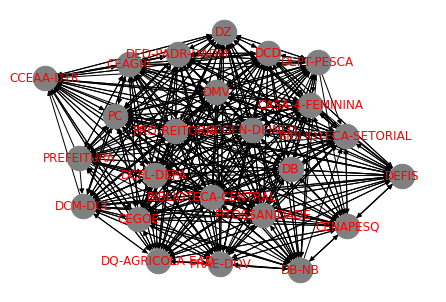


### Histograma de grau de entrada ###


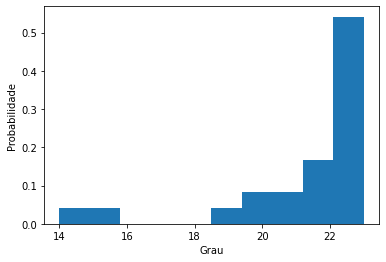


### Histograma de grau de saída ###


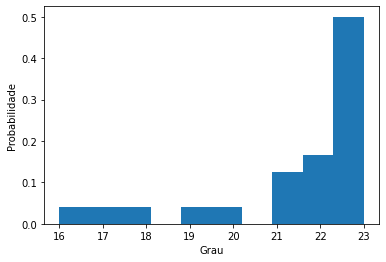


### Grau médio ###
Dados: Name: 
Type: DiGraph
Number of nodes: 24
Number of edges: 517
Average in degree:  21.5417
Average out degree:  21.5417

### Grau máximo de entrada ###
Grau do Hub de entrada: 23

### Grau máximo de saída ###
Grau do Hub de saída: 23

### Tamanho médio dos caminhos ###
1.0634057971014492

### Densidade ###
Densidade do grafo: 0.9365942028985508

### Coeficiente de Aglomeração ###
CC = 0.9474361216337926

### Histograma de pesos de entrada ###


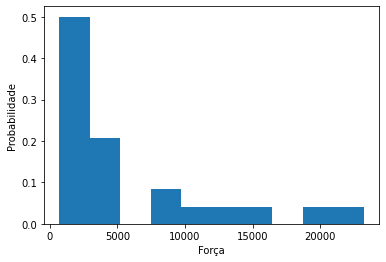


### Nó com maior peso de entrada ###
Nó - Peso = ('CEGOE', 23202.0)

### Nó com menor peso de entrada ###
Nó - Peso = ('FITOSSANIDADE', 710.0)

### Nó com maior peso de saída ###
Nó - Peso = ('PC', 25674.0)

### Nó com menor peso de saída ###
Nó - Peso = ('CCEAA-DTR', 375.0)

### Histograma de pesos de saída ###


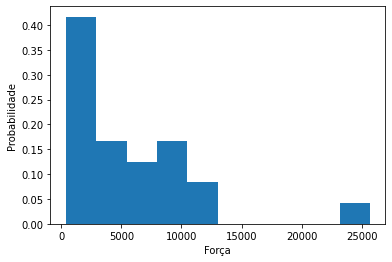

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

from functools import partial
from matplotlib.ticker import FuncFormatter

from google.colab import drive
drive.mount('/content/drive')
grafo = nx.read_edgelist("/content/drive/MyDrive/BSI - UFRPE 2016.1/Modelos de Rede/Projeto/pesos.edgelist", create_using=nx.DiGraph(), data=(("peso", float),))

#Graus de entrada
degIn = []
grausIn = grafo.in_degree()
for nIn,dIn in grausIn:
	degIn.append(dIn)
 
#Graus de saída
degOut = []
grausOut = grafo.out_degree()
for nOut,dOut in grausOut:
	degOut.append(dOut)

#Plotando grafo

nx.draw(grafo, with_labels=True, node_size = 600, node_color='grey', font_color='red')
plt.show()

#Histograma
print("\n### Histograma de grau de entrada ###")
plt.hist(degIn, weights= np.ones_like(degIn) / len(degIn))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

print("\n### Histograma de grau de saída ###")
plt.hist(degOut, weights= np.ones_like(degOut) / len(degOut))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

#Grau Médio
print("\n### Grau médio ###")
informações = nx.info(grafo)

print("Dados: " + str(informações))

#Grau Máximo de Entrada
print("\n### Grau máximo de entrada ###")
hubIn = None 
hubIn = np.amax(degIn)
print("Grau do Hub de entrada: " + str(hubIn))

#Grau Máximo de saída
print("\n### Grau máximo de saída ###")
hubOut = None 
hubOut = np.amax(degOut)
print("Grau do Hub de saída: " + str(hubOut))

#TMC
print("\n### Tamanho médio dos caminhos ###")
tmc = nx.average_shortest_path_length(grafo)
print(tmc)

#Densidade
print("\n### Densidade ###")
print("Densidade do grafo: " + str(nx.density(grafo)))

#CC
print("\n### Coeficiente de Aglomeração ###")
print("CC = " + str(nx.average_clustering(grafo)))

#Força do nó

#Gera lista dos nós com seus pesos de entrada
pesosEntrada = list(grafo.in_degree(weight='peso'))

#Pesos de Entrada
weiIn = []
pesIn = pesosEntrada
for nwIn,dwIn in pesIn:
  weiIn.append(dwIn)

#Histograma Pesos de Entrada
print("\n### Histograma de pesos de entrada ###")
plt.hist(weiIn, weights= np.ones_like(weiIn) / len(weiIn))
plt.xlabel('Força')
plt.ylabel('Probabilidade')
plt.show()

#Obter o nó com maior peso de entrada
maiorPesoEntrada = max(pesosEntrada,key=lambda item:item[1])
print("\n### Nó com maior peso de entrada ###")
print("Nó - Peso = " + str(maiorPesoEntrada))

#Obter o nó com menor peso de entrada
menorPesoEntrada = min(pesosEntrada,key=lambda item:item[1])
print("\n### Nó com menor peso de entrada ###")
print("Nó - Peso = " + str(menorPesoEntrada))

#Gera lista dos nós com seus pesos de saída
pesosSaida = list(grafo.out_degree(weight='peso'))

#Obter o nó com maior peso de saída
print("\n### Nó com maior peso de saída ###")
maiorPesoSaida = max(pesosSaida,key=lambda item:item[1])
print("Nó - Peso = " + str(maiorPesoSaida))

#Obter o nó com menor peso de saída
print("\n### Nó com menor peso de saída ###")
menorPesoSaida = min(pesosSaida,key=lambda item:item[1])
print("Nó - Peso = " + str(menorPesoSaida))

#Pesos de Saída
weiOut = []
pesOut = pesosSaida
for nwOut,dwOut in pesOut:
  weiOut.append(dwOut)

#Histograma Pesos de Saída
print("\n### Histograma de pesos de saída ###")
plt.hist(weiOut, weights= np.ones_like(weiOut) / len(weiOut))
plt.xlabel('Força')
plt.ylabel('Probabilidade')
plt.show()
